In [ ]:
pip install yfinance pandas matplotlib scikit-learn tensorflow keras streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd

# Choose the stock ticker symbol (example: Apple = 'AAPL')
ticker = 'AAPL'

# Download historical data
data = yf.download(ticker, start='2015-01-01', end='2025-01-01')

# Show first few rows
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.288586  24.757340  23.848711  24.746232  212818400
2015-01-05  23.604330  24.137511  23.417718  24.057533  257142000
2015-01-06  23.606554  23.866479  23.244435  23.668758  263188400
2015-01-07  23.937567  24.037537  23.704300  23.815379  160423600
2015-01-08  24.857307  24.915069  24.148621  24.266367  237458000


In [ ]:
data.to_csv(f'{ticker}_stock_data.csv')

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Extract Close prices
close_prices = data['Close'].values.reshape(-1, 1)

# View shape
print(f'Close prices shape: {close_prices.shape}')

Close prices shape: (2516, 1)


In [ ]:
# Normalize to range [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# View first few normalized values
print(scaled_data[:5])

[[0.01531502]
 [0.01243696]
 [0.01244632]
 [0.0138386 ]
 [0.01770713]]


In [ ]:
# Look back period
look_back = 60

# Prepare training data
X_train = []
y_train = []

for i in range(look_back, len(scaled_data)):
    X_train.append(scaled_data[i-look_back:i, 0])  # Sequence of 60 days
    y_train.append(scaled_data[i, 0])               # Target: next day price

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (2456, 60)
y_train shape: (2456,)


In [ ]:
# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

print(f'Reshaped X_train shape: {X_train.shape}')

Reshaped X_train shape: (2456, 60, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Initialize the model
model = Sequential()

# First LSTM layer (returns sequences)
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout regularization

# Second LSTM layer (does not return sequences)
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Dense layers
model.add(Dense(units=25))
model.add(Dense(units=1))  # Output layer (predict single value)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0305
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0019
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0016
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0013
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0013
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0012
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0014
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0010
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 9.8030e-04
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 9.2370e-04
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0011
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 8.0875e-04
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 7.5766e-04
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 9.7452e-04
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step

In [ ]:
# Save the model weights
model.save('lstm_stock_model.h5')

In [ ]:
# Define size of training data
training_data_len = int(len(scaled_data) * 0.8)

# Prepare training data
train_data = scaled_data[0:training_data_len, :]

# Prepare test data
test_data = scaled_data[training_data_len - 60:, :]  # keep last 60 for context

# Create X_train and y_train
X_train = []
y_train = []

look_back = 60

for i in range(look_back, len(train_data)):
    X_train.append(train_data[i-look_back:i, 0])
    y_train.append(train_data[i, 0])

# Convert to arrays and reshape
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [ ]:
# Train the model on training data
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 4.7768e-04 - val_loss: 7.3949e-04
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 4.3339e-04 - val_loss: 6.2927e-04
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 3.7630e-04 - val_loss: 6.0742e-04
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 3.5507e-04 - val_loss: 7.1441e-04
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 3.7025e-04 - val_loss: 5.3678e-04
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 3.3342e-04 - val_loss: 7.0067e-04
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 3.7266e-04 - val_loss: 5.8276e-04
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 3.5549e-04 - val_loss: 6.1439e-04
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 3.5013e-04 - val_loss: 7.5300e-04
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 3.2903e-04 - val_loss: 6.5944e-04
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 3.7418e-0

In [ ]:
# Prepare X_test and y_test
X_test = []
y_test = close_prices[training_data_len:]  # actual Close prices (not scaled)

for i in range(look_back, len(test_data)):
    X_test.append(test_data[i-look_back:i, 0])

# Convert and reshape
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform back to original price range
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [ ]:
import numpy as np

# Compute RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 7.4501603611942695


<ipython-input-19-832760e90878>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


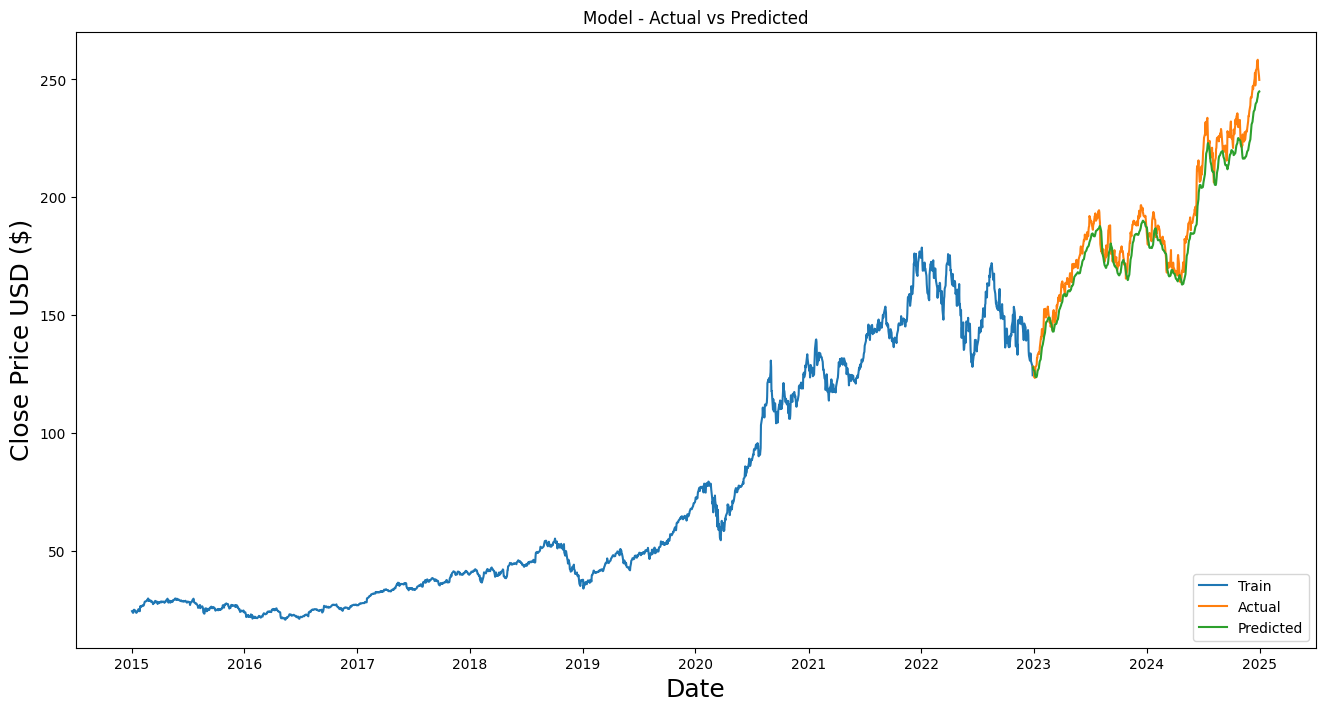

In [ ]:
# Create dataframe to plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title('Model - Actual vs Predicted')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.show()

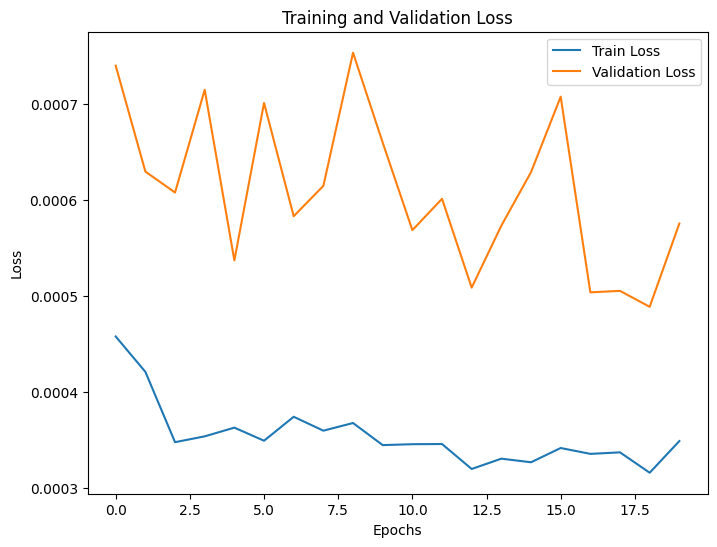

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Create new dataframe to hold predictions
train = data[:training_data_len]
valid = data[training_data_len:]

# Add predictions column to valid dataframe
valid['Predictions'] = predictions

<ipython-input-21-884de966bce5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


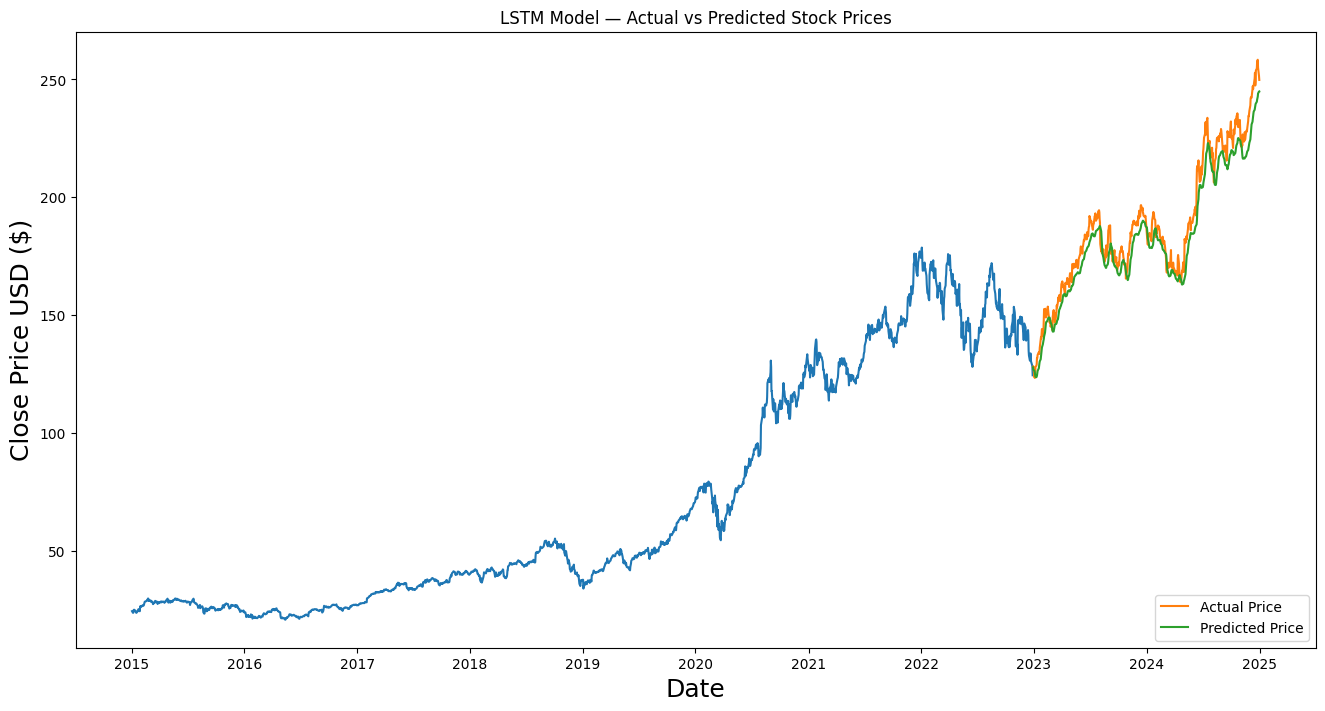

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model — Actual vs Predicted Stock Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot training data (blue)
plt.plot(train['Close'])

# Plot actual stock prices in validation data (green)
plt.plot(valid['Close'], label='Actual Price')

# Plot predicted stock prices (red)
plt.plot(valid['Predictions'], label='Predicted Price')

# Add legend
plt.legend(loc='lower right')

# Show plot
plt.show()

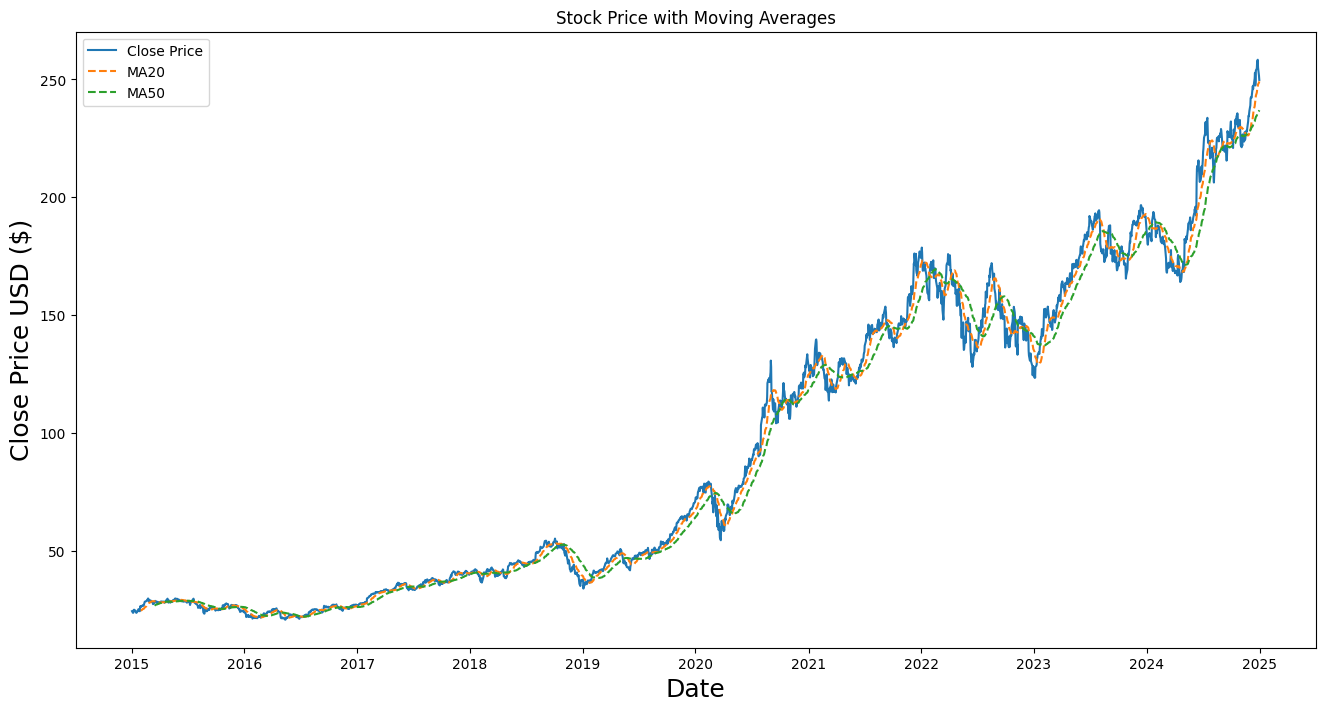

In [ ]:
# Add Moving Averages
data['MA20'] = data['Close'].rolling(window=20).mean()  # 20-day MA
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50-day MA

# Plot Close price + Moving Averages
plt.figure(figsize=(16,8))
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot Close price
plt.plot(data['Close'], label='Close Price')

# Plot MA20
plt.plot(data['MA20'], label='MA20', linestyle='--')

# Plot MA50
plt.plot(data['MA50'], label='MA50', linestyle='--')

plt.legend(loc='upper left')
plt.show()

In [ ]:
# RSI calculation function
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

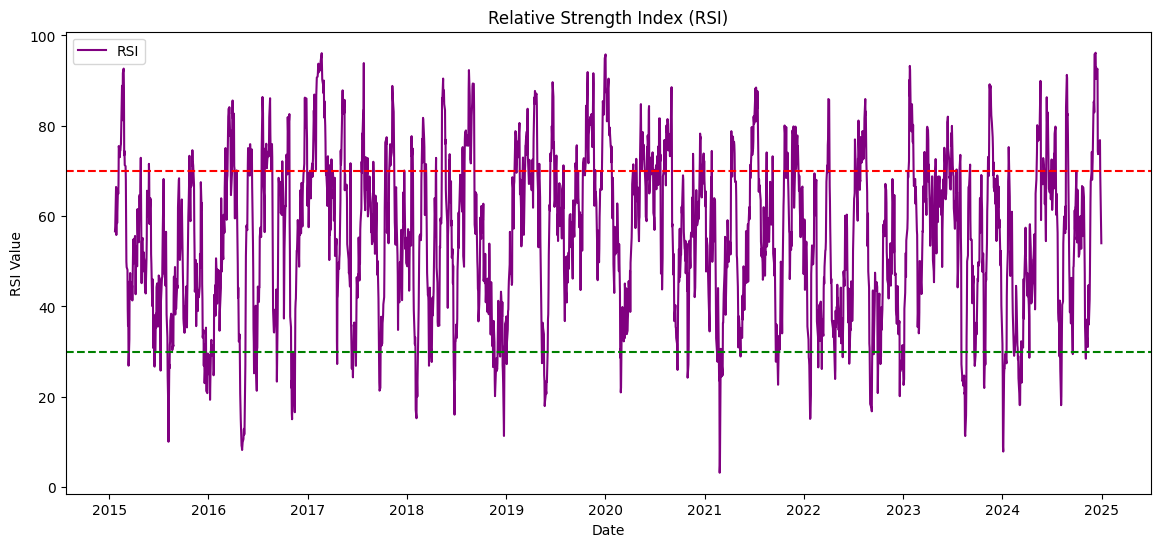

In [ ]:
# Add RSI to dataframe
data['RSI'] = compute_rsi(data)

# Plot RSI
plt.figure(figsize=(14,6))
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')

plt.plot(data['RSI'], label='RSI', color='purple')

# Horizontal lines at 70 (overbought) and 30 (oversold)
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')

plt.legend(loc='upper left')
plt.show()

In [ ]:
pip install streamlit yfinance matplotlib scikit-learn tensorflow keras

2025-06-10 15:53:32.434 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 15:53:33.554 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-10 15:53:33.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 15:53:33.572 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 15:53:33.573 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 15:53:33.592 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 15:53:33.595 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 15:53:33.596 Session state does not 

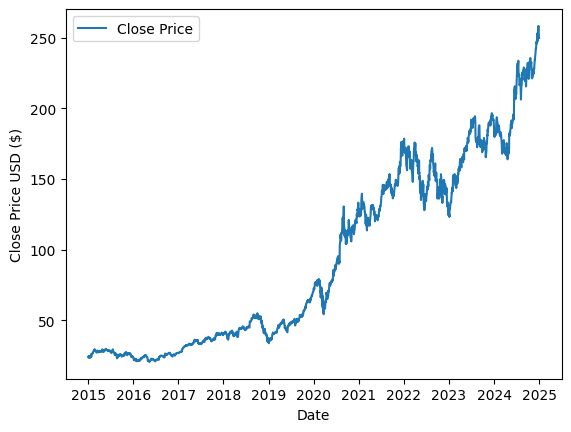

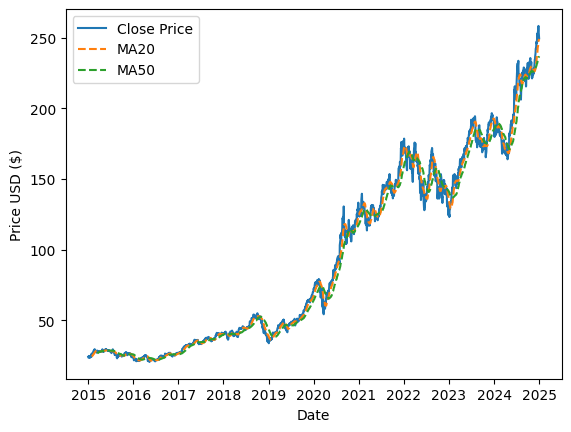

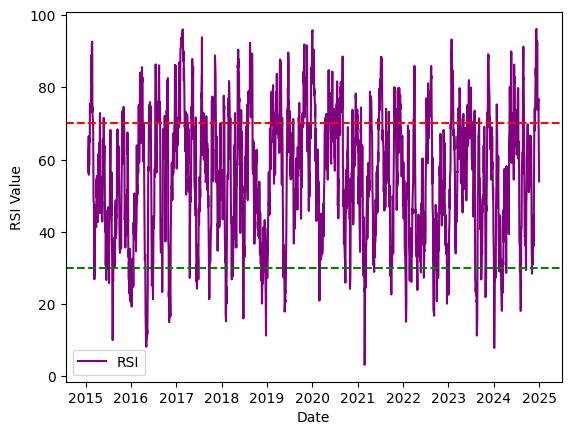

In [ ]:
# app.py

import streamlit as st
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import numpy as np

# App title
st.title('📈 Stock Price Trend Prediction Dashboard')

# User inputs ticker
ticker = st.text_input('Enter Stock Ticker (Example: AAPL, TSLA, INFY.NS)', 'AAPL')

# Date range
start_date = st.date_input('Start Date', pd.to_datetime('2015-01-01'))
end_date = st.date_input('End Date', pd.to_datetime('2025-01-01'))

# Load data
data = yf.download(ticker, start=start_date, end=end_date)

# Show raw data
st.subheader('Raw Data')
st.write(data.tail())

# Plot Close price
st.subheader('Close Price History')
fig1, ax1 = plt.subplots()
ax1.plot(data['Close'], label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price USD ($)')
ax1.legend()
st.pyplot(fig1)

# Moving Averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Plot with MA
st.subheader('Close Price with Moving Averages')
fig2, ax2 = plt.subplots()
ax2.plot(data['Close'], label='Close Price')
ax2.plot(data['MA20'], label='MA20', linestyle='--')
ax2.plot(data['MA50'], label='MA50', linestyle='--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price USD ($)')
ax2.legend()
st.pyplot(fig2)

# RSI calculation
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Add RSI
data['RSI'] = compute_rsi(data)

# Plot RSI
st.subheader('Relative Strength Index (RSI)')
fig3, ax3 = plt.subplots()
ax3.plot(data['RSI'], label='RSI', color='purple')
ax3.axhline(70, color='red', linestyle='--')
ax3.axhline(30, color='green', linestyle='--')
ax3.set_xlabel('Date')
ax3.set_ylabel('RSI Value')
ax3.legend()
st.pyplot(fig3)

# Predict future prices (Optional advanced block)
# Example: load your pre-trained model and use it here
# model = load_model('lstm_stock_model.h5')
# Add code for predicting and plotting predictions vs actual here!

st.write('ℹ️ You can extend this app by adding your LSTM model predictions here! 🚀')